In [1]:
import pprint
import numpy as np
import pandas as pd
import sys

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# All Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
malware_data_filepath = './datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

In [3]:
malware_data.shape

(58596, 57)

In [4]:
malware_data.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [5]:
malware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [6]:
malware_data.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [7]:
malware_data.Class.value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [8]:
malware_data.Category.value_counts()

Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Class', ylabel='count'>

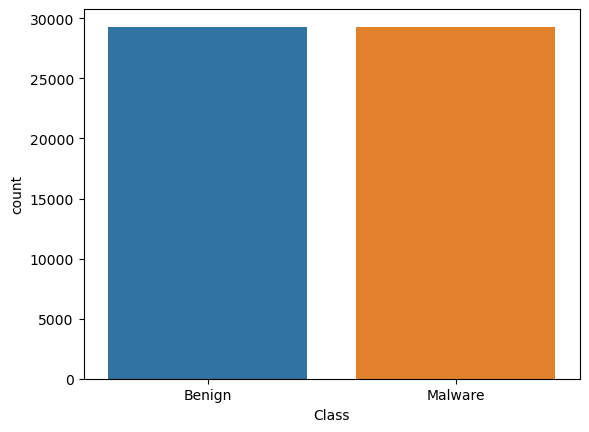

In [9]:
sns.countplot(x=malware_data.Class)

/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Category', ylabel='count'>

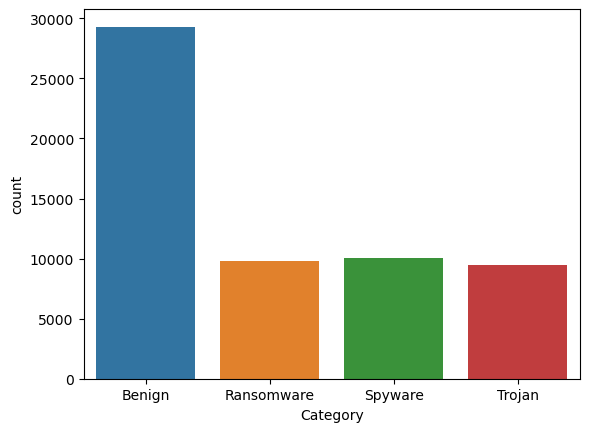

In [10]:
sns.countplot(x=malware_data.Category)

<Axes: ylabel='count'>

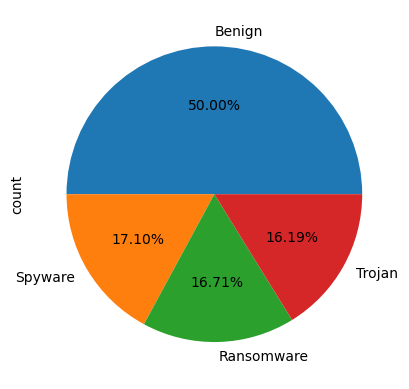

In [11]:
malware_data.Category.value_counts().plot(kind="pie", autopct="%.2f%%")

In [12]:
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Class
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=0, stratify=y)

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 50)
y_train shape: (41017,)
X_test shape: (17579, 50)
y_test shape: (17579,)


In [15]:

kernel = 1.0 * RBF(1.0)
ada = AdaBoostClassifier(n_estimators=malware_data.shape[1], learning_rate=1, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
lg = LogisticRegression(random_state=42)
mlp = MLPClassifier(random_state=42)
qda = QuadraticDiscriminantAnalysis()
######################################################################################
xgb = XGBClassifier(device="cuda")
lgbm = LGBMClassifier(n_estimators=malware_data.shape[1] ,random_state=42)
rfc = RandomForestClassifier(n_estimators=malware_data.shape[1],random_state=42)
gbc = GradientBoostingClassifier(n_estimators=malware_data.shape[1], random_state=42)
etc = ExtraTreesClassifier(n_estimators=malware_data.shape[1], random_state=42)
svc = LinearSVC(random_state=42)
gnb = GaussianNB()

In [16]:
classifiers = [
    ("XGBoost", xgb),
    ("LGBM", lgbm),
    ("RandomForest", rfc),
    ("GradientBoosting", gbc),
    ("ExtraTrees", etc),
    ("LinearSVC", svc),
    ("GaussianNB", gnb),
    ("AdaBoost", ada),
    ("DecisionTree", dtc),
    # ("GaussianProcess", gpc),
    
    ("KNN", knn),
    ("LogisticRegression", lg),
    ("MLP", mlp),
    ("QDA", qda)
]

In [17]:
scores_df_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score", "Task"]
scores_df_binary = pd.DataFrame(columns=scores_df_cols)

In [18]:
for clf_name, clf in classifiers:
    print(f"DEBUG: Fitting model: {clf_name}")
    clf.fit(X_train, y_train)
    print("DEBUG: model fitted. now predicting")
    y_pred = clf.predict(X_test)
    print("DEBUG: model predicted. now inserting results in dataframe")
    new_row = pd.DataFrame({
        "Model Name": [clf_name],
        "Accuracy Score": [accuracy_score(y_test, y_pred)],
        "F1 Score": [f1_score(y_test, y_pred, average='binary')],
        "Precision Score": [precision_score(y_test, y_pred, average='binary')],
        "Recall Score": [recall_score(y_test, y_pred, average='binary')],
        "Task": ["Binary"]
    })
    print("DEBUG: concatenating results to scores_df")
    scores_df_binary = pd.concat([scores_df_binary, new_row],ignore_index=True)

DEBUG: Fitting model: XGBoost
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: LGBM


/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397688861/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/tmp/ipykernel_10255/3215715727.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df_binar

[LightGBM] [Info] Number of positive: 20509, number of negative: 20508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7600
[LightGBM] [Info] Number of data points in the train set: 41017, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500012 -> initscore=0.000049
[LightGBM] [Info] Start training from score 0.000049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: RandomForest
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatena

/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: GaussianNB
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: AdaBoost
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: DecisionTree
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: KNN
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: LogisticRegression


/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: MLP
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df
DEBUG: Fitting model: QDA
DEBUG: model fitted. now predicting
DEBUG: model predicted. now inserting results in dataframe
DEBUG: concatenating results to scores_df


/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [19]:
scores_df_binary

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score,Task
0,XGBoost,0.999886,0.999886,0.999772,1.000000,Binary
1,LGBM,0.999886,0.999886,0.999772,1.000000,Binary
2,RandomForest,0.999772,0.999772,0.999545,1.000000,Binary
3,GradientBoosting,0.999488,0.999488,0.999772,0.999204,Binary
4,ExtraTrees,0.999886,0.999886,0.999772,1.000000,Binary
5,LinearSVC,0.993458,0.993442,0.995884,0.991011,Binary
6,GaussianNB,0.992207,0.992234,0.988703,0.995790,Binary
7,AdaBoost,0.999829,0.999829,0.999659,1.000000,Binary
8,DecisionTree,0.999602,0.999602,0.999545,0.999659,Binary
9,KNN,0.999374,0.999374,0.999431,0.999317,Binary


In [20]:
y_column = malware_data.Category
class_le = LabelEncoder()
y_cat = class_le.fit_transform(y_column)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X ,y_cat, test_size=0.3, random_state=0, stratify=y)

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 50)
y_train shape: (41017,)
X_test shape: (17579, 50)
y_test shape: (17579,)


In [23]:
scores_df_multi = pd.DataFrame(columns=scores_df_cols)

In [24]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    new_row = pd.DataFrame({
        "Model Name": [clf_name],
        "Accuracy Score": [accuracy_score(y_test, y_pred)],
        "F1 Score": [f1_score(y_test, y_pred, average='weighted', zero_division=0)],
        "Precision Score": [precision_score(y_test, y_pred, average='weighted', zero_division=0)],
        "Recall Score": [recall_score(y_test, y_pred, average='weighted', zero_division=0)],
        "Task" : ["Multi"]
    })
    scores_df_multi = pd.concat([scores_df_multi, new_row], ignore_index=True)

/tmp/ipykernel_10255/1993454740.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df_multi = pd.concat([scores_df_multi, new_row], ignore_index=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7600
[LightGBM] [Info] Number of data points in the train set: 41017, number of used features: 50
[LightGBM] [Info] Start training from score -0.693172
[LightGBM] [Info] Start training from score -1.782031
[LightGBM] [Info] Start training from score -1.768934
[LightGBM] [Info] Start training from score -1.825100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/aaavila/anaconda3/envs/malware_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

In [25]:
scores_df_multi

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score,Task
0,XGBoost,0.870982,0.870651,0.870662,0.870982,Multi
1,LGBM,0.860914,0.860669,0.860614,0.860914,Multi
2,RandomForest,0.869674,0.869661,0.869672,0.869674,Multi
3,GradientBoosting,0.818761,0.818863,0.820343,0.818761,Multi
4,ExtraTrees,0.860743,0.860763,0.860787,0.860743,Multi
5,LinearSVC,0.658513,0.579167,0.799890,0.658513,Multi
6,GaussianNB,0.683941,0.639049,0.720341,0.683941,Multi
7,AdaBoost,0.671654,0.619255,0.708355,0.671654,Multi
8,DecisionTree,0.841174,0.841145,0.841131,0.841174,Multi
9,KNN,0.810683,0.811216,0.813425,0.810683,Multi


In [26]:
scores_df_multi['Accuracy Score'].values

array([0.87098242, 0.86091359, 0.86967404, 0.81876102, 0.86074293,
       0.658513  , 0.68394107, 0.67165368, 0.84117413, 0.8106832 ,
       0.6870698 , 0.70533022, 0.6870698 ])

In [27]:
scores_df_binary['Accuracy Score'].values

array([0.99988623, 0.99988623, 0.99977246, 0.99948803, 0.99988623,
       0.9934581 , 0.99220661, 0.99982934, 0.9996018 , 0.99937425,
       0.99493714, 0.99584732, 0.99829342])

In [28]:
np.unique(scores_df_binary['Task'])[0]

'Binary'

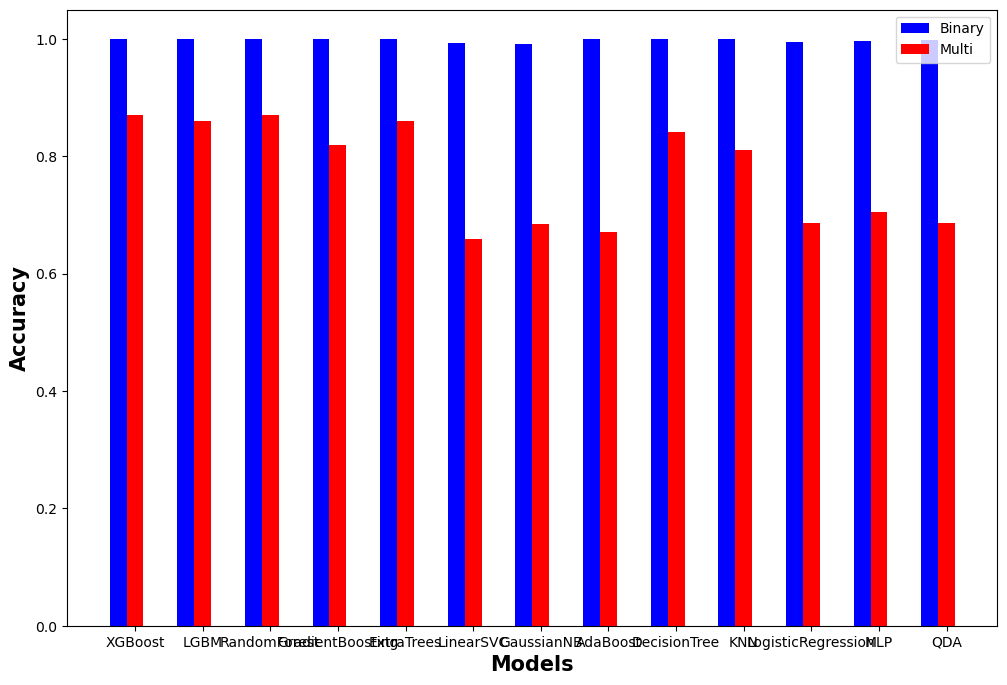

In [29]:
plt.subplots(figsize=(12, 8))
barwidth = 0.25

b1_bin = np.arange(len(scores_df_binary['Model Name']))
b1_multi = [x + barwidth for x in b1_bin]

# plt.bar( <how far is the bar from origin>, <hieght of the bars>)
plt.bar(b1_bin, scores_df_binary['Accuracy Score'], color='blue', width=barwidth, label=np.unique(scores_df_binary['Task'])[0])
plt.bar(b1_multi, scores_df_multi['Accuracy Score'], color='red', width=barwidth, label=np.unique(scores_df_multi['Task'])[0])

plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barwidth for r in range(len(scores_df_binary['Model Name']))], labels=scores_df_binary['Model Name'].tolist())

plt.legend()
plt.show()

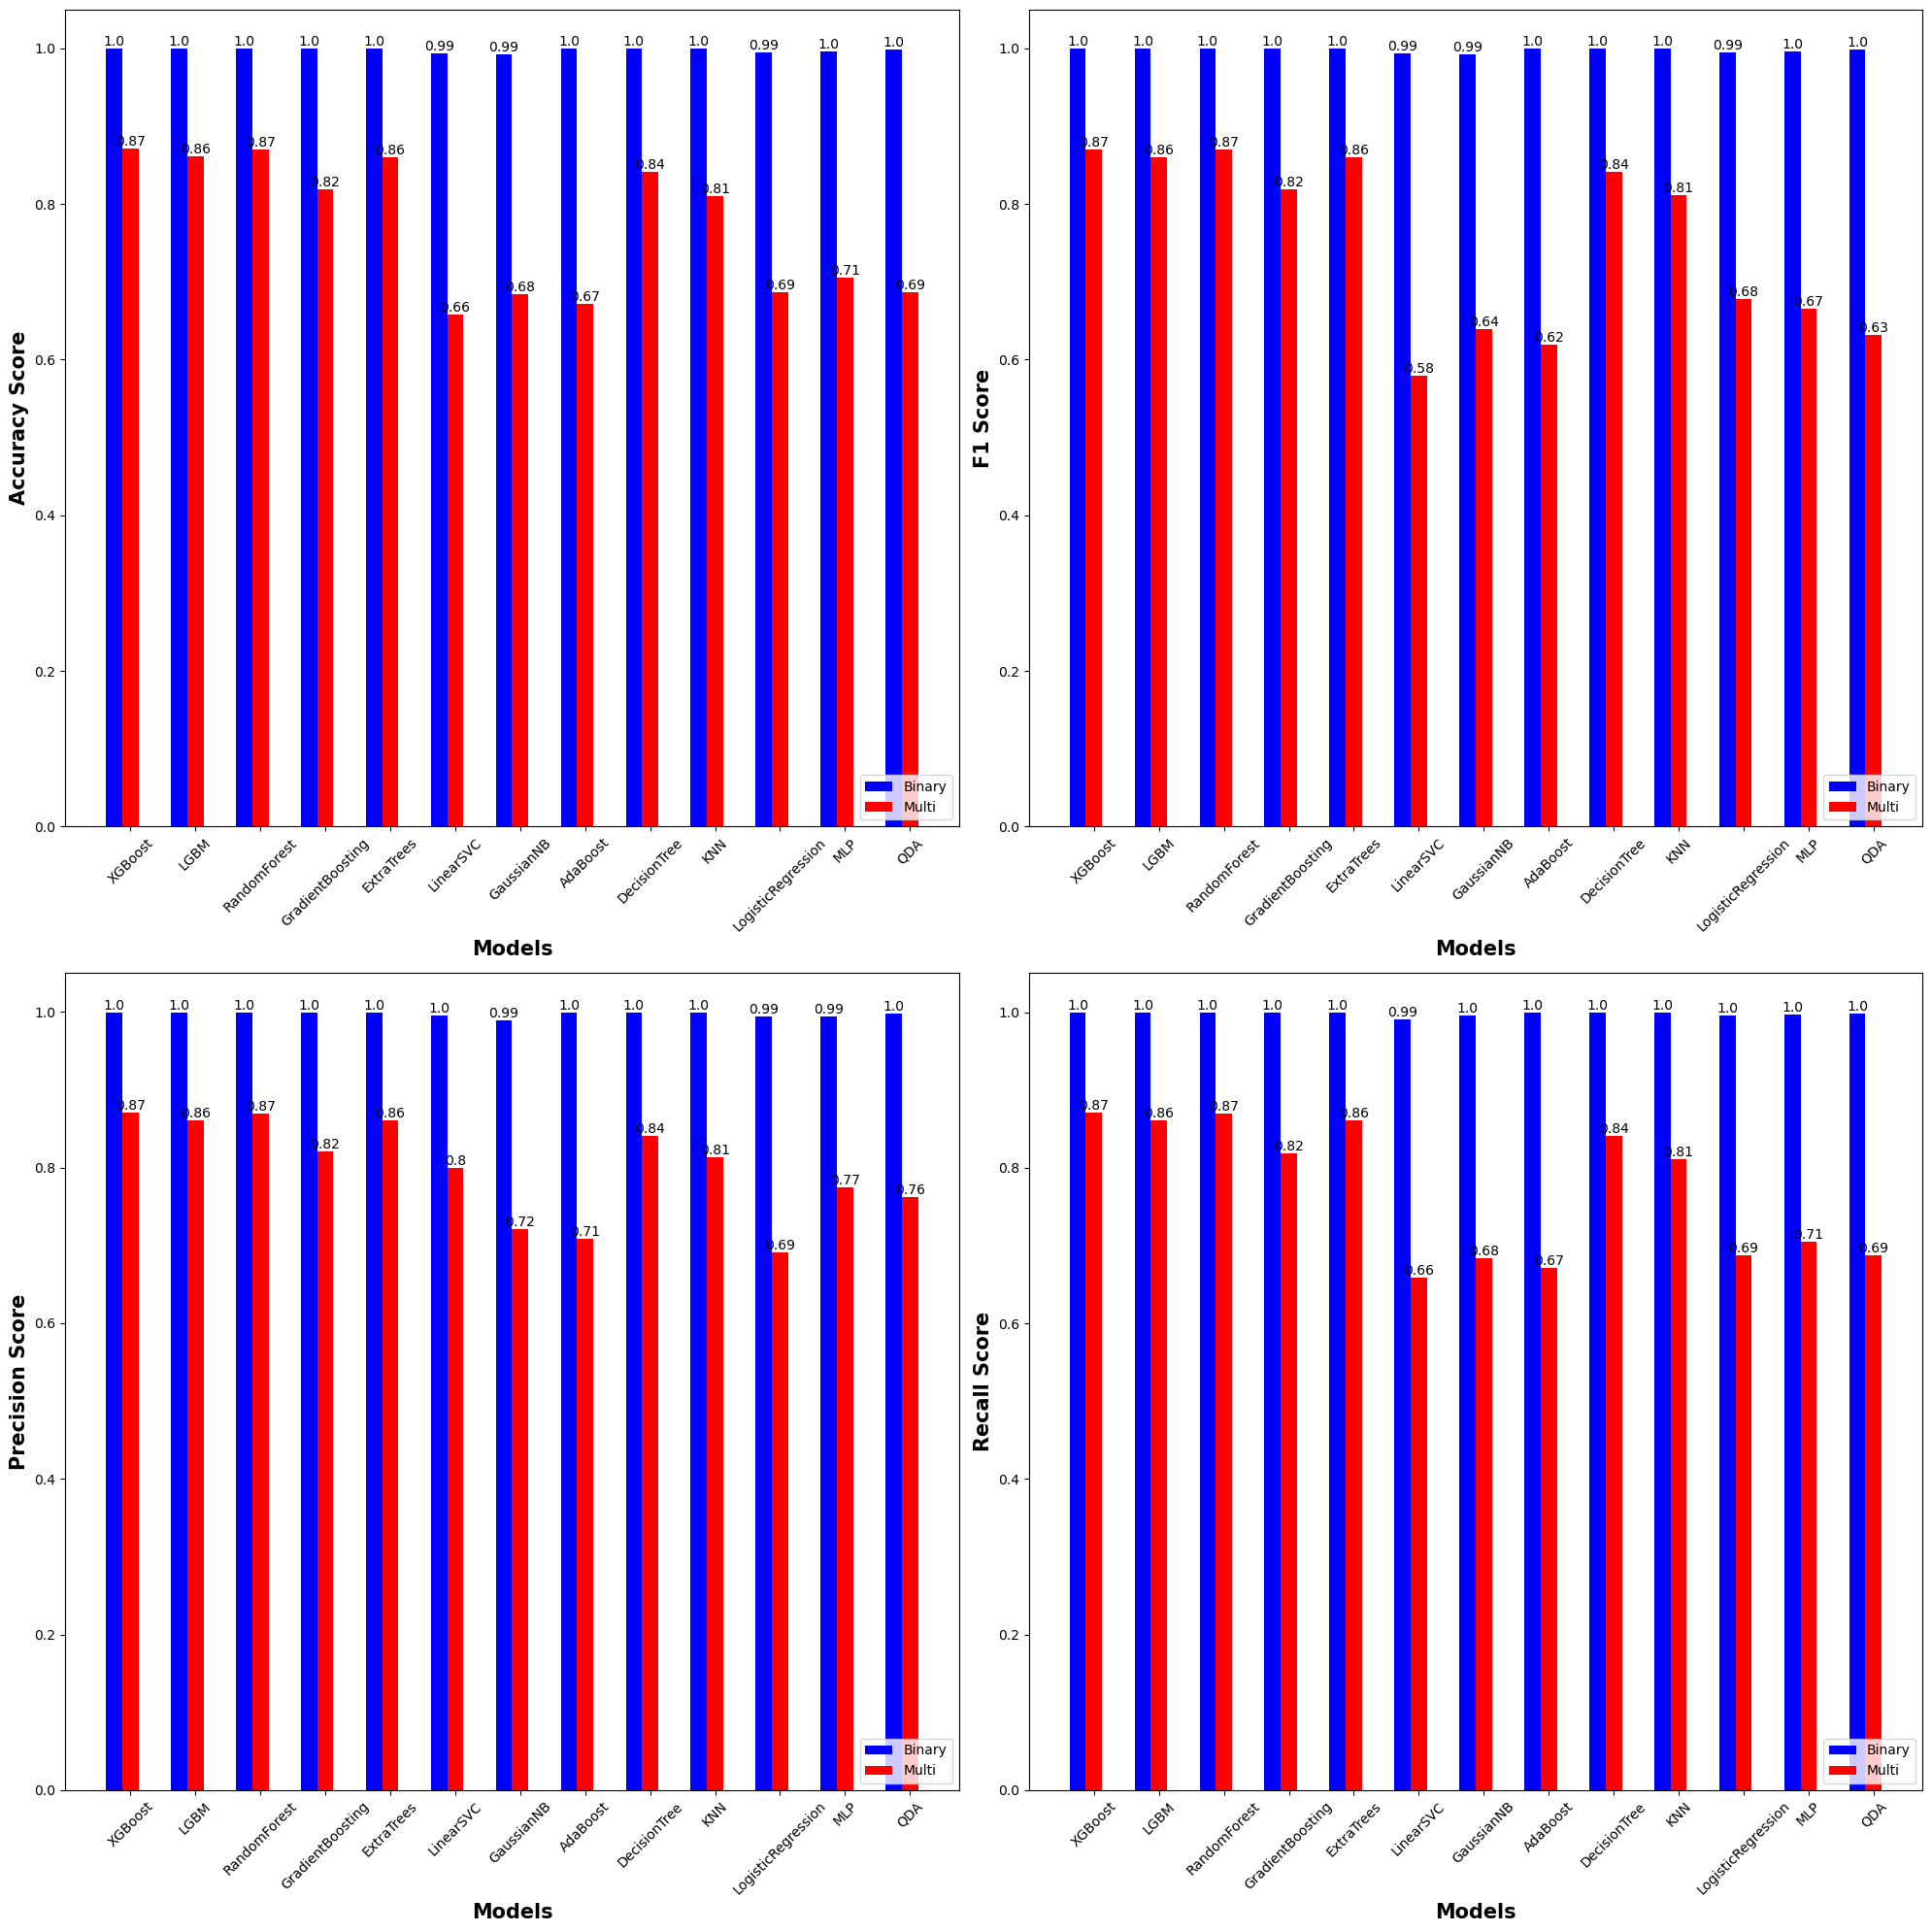

In [30]:
metrics = ['Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
plt.figure(figsize=(20, 20))
barwidth = 0.25
for i, tup in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    b1_bin = np.arange(len(scores_df_binary['Model Name']))
    b1_multi = [x + barwidth for x in b1_bin]
    bars_bin = plt.bar(b1_bin, scores_df_binary[metrics[i]], color='blue', width=barwidth, label=np.unique(scores_df_binary['Task'])[0])
    bars_multi = plt.bar(b1_multi, scores_df_multi[metrics[i]], color='red', width=barwidth, label=np.unique(scores_df_multi['Task'])[0])
    plt.xlabel('Models', fontweight ='bold', fontsize = 15)
    plt.ylabel(metrics[i], fontweight ='bold', fontsize = 15)
    plt.xticks([r + barwidth for r in range(len(scores_df_binary['Model Name']))], labels=scores_df_binary['Model Name'].tolist())
    plt.xticks(rotation=45) 
    plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
    for bar in bars_bin:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    for bar in bars_multi:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
     
plt.tight_layout()
plt.show()
    
    